In [1]:
# A bit of setup

import numpy as np
import matplotlib.pyplot as plt

from cs231n.classifiers.neural_net import TwoLayerNet

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
  """ returns relative error """
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

In [2]:
from cs231n.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = range(num_training, num_training + num_validation)
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = range(num_training)
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = range(num_test)
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print 'Train data shape: ', X_train.shape
print 'Train labels shape: ', y_train.shape
print 'Validation data shape: ', X_val.shape
print 'Validation labels shape: ', y_val.shape
print 'Test data shape: ', X_test.shape
print 'Test labels shape: ', y_test.shape

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


In [3]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

Learning rate:  1e-05
iteration 0 / 1000: loss 6.316629
iteration 100 / 1000: loss 4.233339
iteration 200 / 1000: loss 3.989365
iteration 300 / 1000: loss 3.893268
iteration 400 / 1000: loss 3.420149
iteration 500 / 1000: loss 3.589886
iteration 600 / 1000: loss 3.622974
iteration 700 / 1000: loss 3.030554
iteration 800 / 1000: loss 3.217544
iteration 900 / 1000: loss 3.267331
Validation accuracy:  0.319


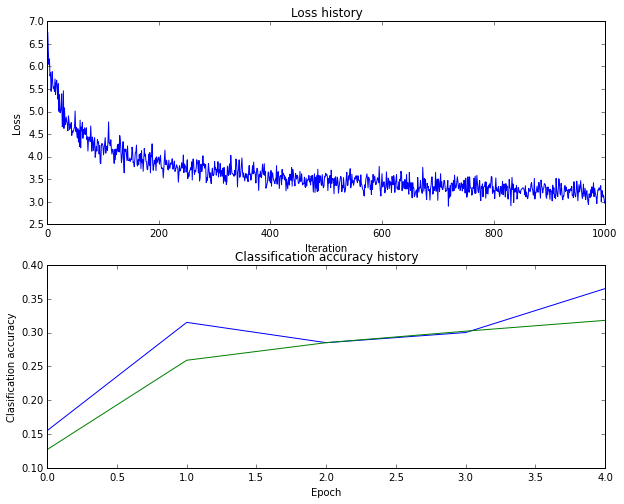

Learning rate:  0.0001
iteration 0 / 1000: loss 3.330390
iteration 100 / 1000: loss 2.915491
iteration 200 / 1000: loss 2.735387
iteration 300 / 1000: loss 2.852581
iteration 400 / 1000: loss 2.847988
iteration 500 / 1000: loss 2.740002
iteration 600 / 1000: loss 2.473292
iteration 700 / 1000: loss 2.562026
iteration 800 / 1000: loss 2.593599
iteration 900 / 1000: loss 2.280664
Validation accuracy:  0.39


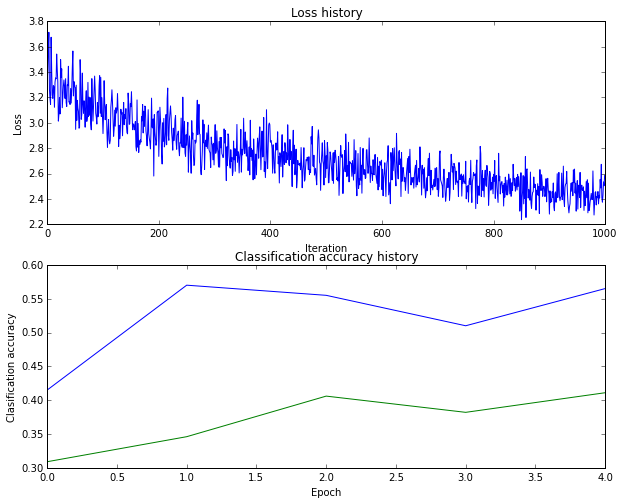

Learning rate:  0.001
iteration 0 / 1000: loss 2.479646
iteration 100 / 1000: loss 2.477519
iteration 200 / 1000: loss 1.997923
iteration 300 / 1000: loss 2.138190
iteration 400 / 1000: loss 1.875204
iteration 500 / 1000: loss 1.735952
iteration 600 / 1000: loss 1.709377
iteration 700 / 1000: loss 1.813737
iteration 800 / 1000: loss 1.526500
iteration 900 / 1000: loss 1.720751
Validation accuracy:  0.497


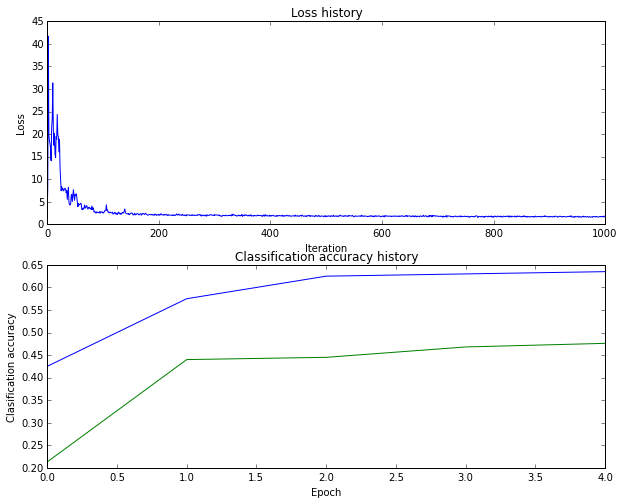

Learning rate:  0.01
iteration 0 / 1000: loss 1.648952
iteration 100 / 1000: loss inf
iteration 200 / 1000: loss inf
iteration 300 / 1000: loss inf

cs231n/classifiers/neural_net.py:112: RuntimeWarning: divide by zero encountered in log
  loss = np.sum(-np.log(correct_probs)) / X.shape[0]
cs231n/classifiers/neural_net.py:107: RuntimeWarning: overflow encountered in subtract
  scores -= np.max(scores,axis=1,keepdims=True)



iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan
Validation accuracy:  0.087


cs231n/classifiers/neural_net.py:107: RuntimeWarning: invalid value encountered in subtract
  scores -= np.max(scores,axis=1,keepdims=True)
cs231n/classifiers/neural_net.py:134: RuntimeWarning: invalid value encountered in less_equal
  da1[a1 <= 0] = 0


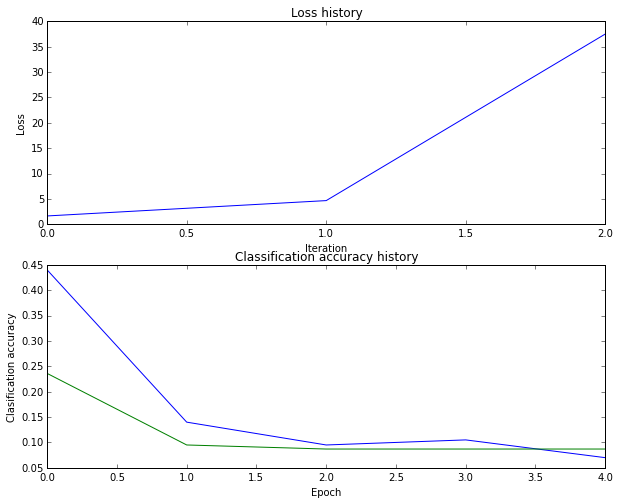

In [5]:
lr = range(-5,-1)
for i in lr:
    print "Learning rate: ", 10**i

    stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=10**i, learning_rate_decay=0.95,
            reg=0.5, verbose=True)

    # Predict on the validation set
    val_acc = (net.predict(X_val) == y_val).mean()
    print 'Validation accuracy: ', val_acc
    
    plt.subplot(2, 1, 1)
    plt.plot(stats['loss_history'])
    plt.title('Loss history')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    
    plt.subplot(2, 1, 2)
    plt.plot(stats['train_acc_history'], label='train')
    plt.plot(stats['val_acc_history'], label='val')
    plt.title('Classification accuracy history')
    plt.xlabel('Epoch')
    plt.ylabel('Clasification accuracy')
    plt.show()


## Regularization strength course Tuning

Regularization strength:  0
iteration 0 / 1000: loss 5.338326
iteration 100 / 1000: loss 2.525410
iteration 200 / 1000: loss 1.636258
iteration 300 / 1000: loss 1.678588
iteration 400 / 1000: loss 1.446591
iteration 500 / 1000: loss 1.437409
iteration 600 / 1000: loss 1.592414
iteration 700 / 1000: loss 1.428983
iteration 800 / 1000: loss 1.430364
iteration 900 / 1000: loss 1.444284
Validation accuracy:  0.461


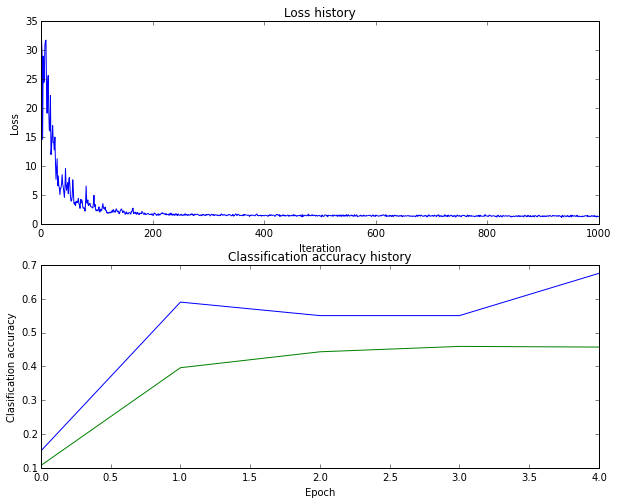

Regularization strength:  3
iteration 0 / 1000: loss 5.264326
iteration 100 / 1000: loss 3.668567
iteration 200 / 1000: loss 2.782485
iteration 300 / 1000: loss 2.354613
iteration 400 / 1000: loss 2.135033
iteration 500 / 1000: loss 1.960754
iteration 600 / 1000: loss 1.805260
iteration 700 / 1000: loss 1.752964
iteration 800 / 1000: loss 1.822758
iteration 900 / 1000: loss 1.651432
Validation accuracy:  0.474


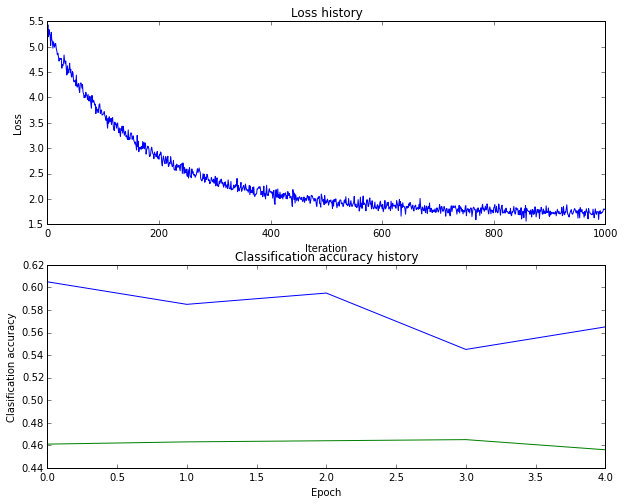

Regularization strength:  6
iteration 0 / 1000: loss 2.007190
iteration 100 / 1000: loss 1.972539
iteration 200 / 1000: loss 1.838950
iteration 300 / 1000: loss 1.944217
iteration 400 / 1000: loss 1.849820
iteration 500 / 1000: loss 1.806551
iteration 600 / 1000: loss 1.819486
iteration 700 / 1000: loss 1.879972
iteration 800 / 1000: loss 1.766058
iteration 900 / 1000: loss 1.843211
Validation accuracy:  0.438


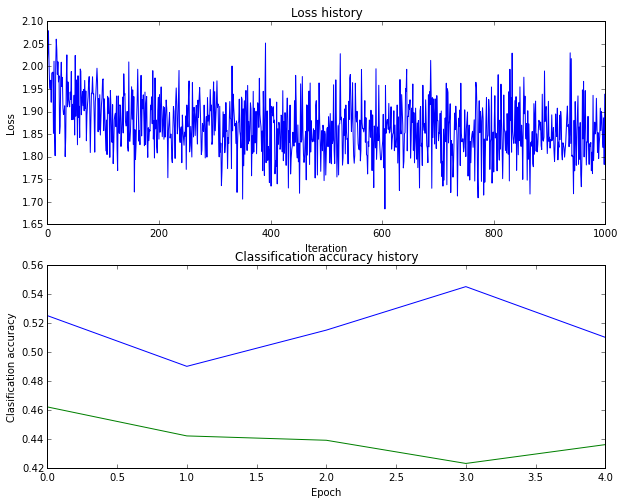

Regularization strength:  9
iteration 0 / 1000: loss 1.965458
iteration 100 / 1000: loss 1.893585
iteration 200 / 1000: loss 1.920944
iteration 300 / 1000: loss 1.909663
iteration 400 / 1000: loss 1.982276
iteration 500 / 1000: loss 1.925258
iteration 600 / 1000: loss 1.926187
iteration 700 / 1000: loss 1.872977
iteration 800 / 1000: loss 1.846904
iteration 900 / 1000: loss 1.866519
Validation accuracy:  0.427


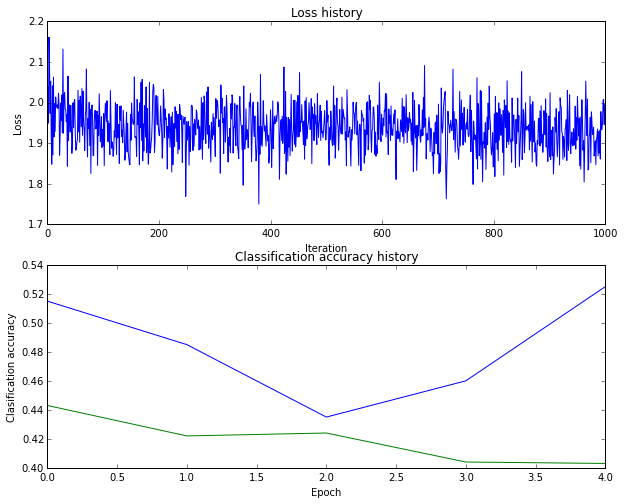

Regularization strength:  12
iteration 0 / 1000: loss 1.973333
iteration 100 / 1000: loss 1.974091
iteration 200 / 1000: loss 2.025037
iteration 300 / 1000: loss 1.948940
iteration 400 / 1000: loss 1.947155
iteration 500 / 1000: loss 1.941588
iteration 600 / 1000: loss 2.019752
iteration 700 / 1000: loss 1.970152
iteration 800 / 1000: loss 2.010892
iteration 900 / 1000: loss 1.955349
Validation accuracy:  0.403


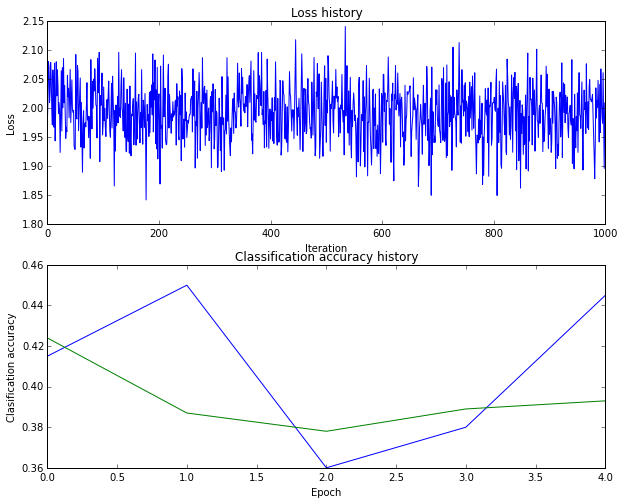

In [5]:
rs = np.arange(0,15,3)
for r in rs:
    print "Regularization strength: ", r

    stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-3, learning_rate_decay=0.95,
            reg=r, verbose=True)

    # Predict on the validation set
    val_acc = (net.predict(X_val) == y_val).mean()
    print 'Validation accuracy: ', val_acc
    
    plt.subplot(2, 1, 1)
    plt.plot(stats['loss_history'])
    plt.title('Loss history')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    
    plt.subplot(2, 1, 2)
    plt.plot(stats['train_acc_history'], label='train')
    plt.plot(stats['val_acc_history'], label='val')
    plt.title('Classification accuracy history')
    plt.xlabel('Epoch')
    plt.ylabel('Clasification accuracy')
    plt.show()


Now from the above Tuning curves We observe the accuracy decreases as Regularization decreases and the training and validation curve shapes also indicate how bad are the training/CV curves beyond certain range.

So, now picking up some good regularization strength ranges and we fine tune to pick a best regularization strength that works better for our problem

Regularization strength:  0.0
iteration 0 / 1000: loss 5.338326
iteration 100 / 1000: loss 2.525410
iteration 200 / 1000: loss 1.636258
iteration 300 / 1000: loss 1.678588
iteration 400 / 1000: loss 1.446591
iteration 500 / 1000: loss 1.437409
iteration 600 / 1000: loss 1.592414
iteration 700 / 1000: loss 1.428983
iteration 800 / 1000: loss 1.430364
iteration 900 / 1000: loss 1.444284
Validation accuracy:  0.461


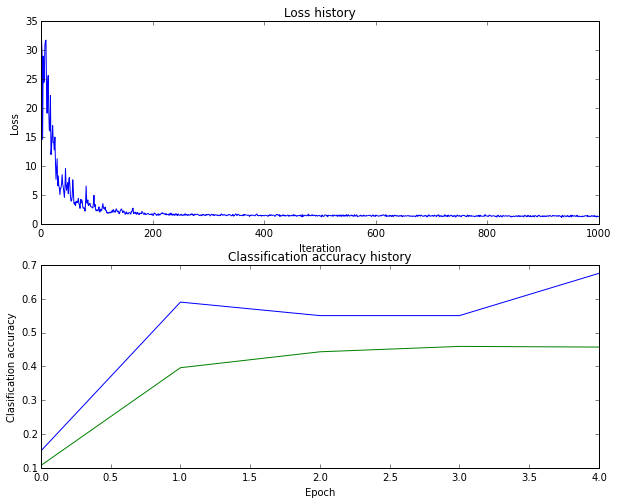

Regularization strength:  0.05
iteration 0 / 1000: loss 1.467319
iteration 100 / 1000: loss 1.408686
iteration 200 / 1000: loss 1.410642
iteration 300 / 1000: loss 1.390923
iteration 400 / 1000: loss 1.477601
iteration 500 / 1000: loss 1.471383
iteration 600 / 1000: loss 1.346479
iteration 700 / 1000: loss 1.359371
iteration 800 / 1000: loss 1.421612
iteration 900 / 1000: loss 1.265489
Validation accuracy:  0.475


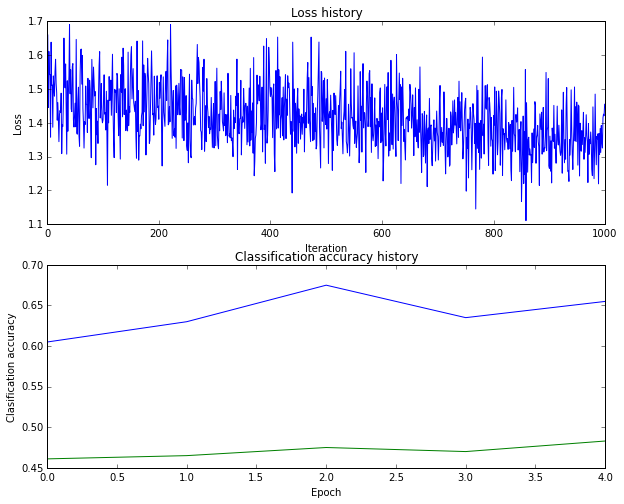

Regularization strength:  0.1
iteration 0 / 1000: loss 1.522398
iteration 100 / 1000: loss 1.435514
iteration 200 / 1000: loss 1.340774
iteration 300 / 1000: loss 1.528399
iteration 400 / 1000: loss 1.343859
iteration 500 / 1000: loss 1.290589
iteration 600 / 1000: loss 1.360324
iteration 700 / 1000: loss 1.436417
iteration 800 / 1000: loss 1.244622
iteration 900 / 1000: loss 1.415394
Validation accuracy:  0.488


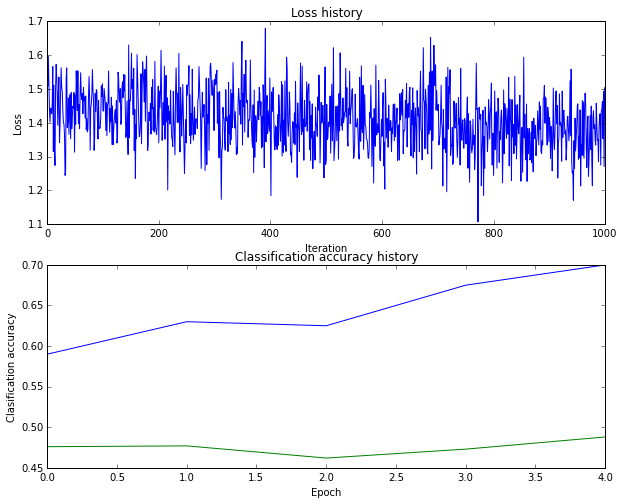

Regularization strength:  0.15
iteration 0 / 1000: loss 1.375709
iteration 100 / 1000: loss 1.379144
iteration 200 / 1000: loss 1.417801
iteration 300 / 1000: loss 1.427970
iteration 400 / 1000: loss 1.566022
iteration 500 / 1000: loss 1.287741
iteration 600 / 1000: loss 1.469969
iteration 700 / 1000: loss 1.383722
iteration 800 / 1000: loss 1.264791
iteration 900 / 1000: loss 1.335499
Validation accuracy:  0.494


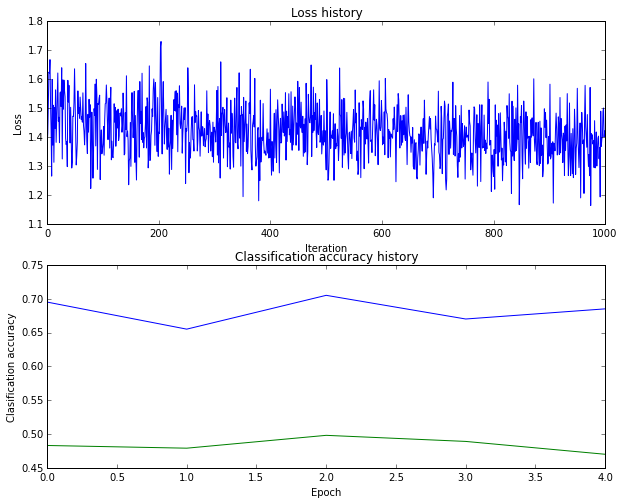

Regularization strength:  0.2
iteration 0 / 1000: loss 1.274782
iteration 100 / 1000: loss 1.362107
iteration 200 / 1000: loss 1.479062
iteration 300 / 1000: loss 1.449846
iteration 400 / 1000: loss 1.358077
iteration 500 / 1000: loss 1.446387
iteration 600 / 1000: loss 1.539401
iteration 700 / 1000: loss 1.487586
iteration 800 / 1000: loss 1.496609
iteration 900 / 1000: loss 1.385509
Validation accuracy:  0.487


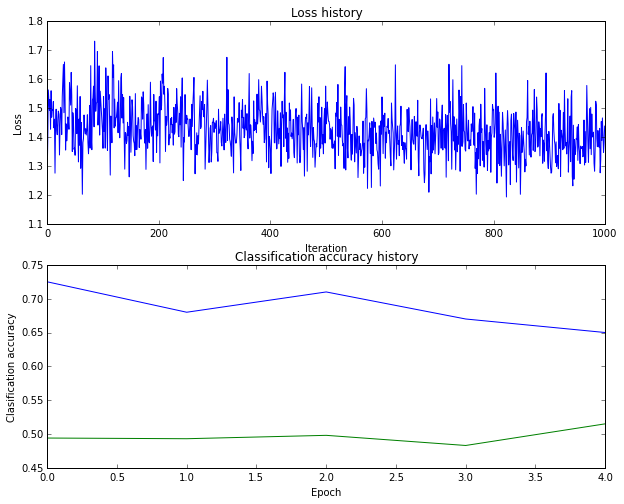

Regularization strength:  0.25
iteration 0 / 1000: loss 1.601531
iteration 100 / 1000: loss 1.375052
iteration 200 / 1000: loss 1.441349
iteration 300 / 1000: loss 1.392242
iteration 400 / 1000: loss 1.261585
iteration 500 / 1000: loss 1.366409
iteration 600 / 1000: loss 1.519165
iteration 700 / 1000: loss 1.296722
iteration 800 / 1000: loss 1.431477
iteration 900 / 1000: loss 1.386941
Validation accuracy:  0.495


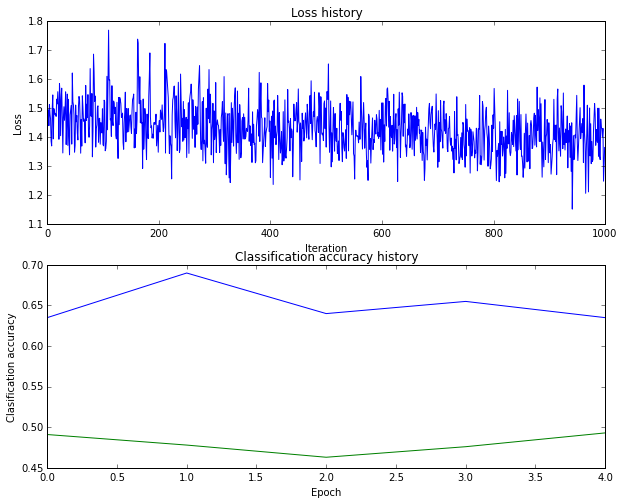

Regularization strength:  0.3
iteration 0 / 1000: loss 1.406840
iteration 100 / 1000: loss 1.428671
iteration 200 / 1000: loss 1.420703
iteration 300 / 1000: loss 1.565639
iteration 400 / 1000: loss 1.437806
iteration 500 / 1000: loss 1.370140
iteration 600 / 1000: loss 1.388012
iteration 700 / 1000: loss 1.394923
iteration 800 / 1000: loss 1.427475
iteration 900 / 1000: loss 1.442973
Validation accuracy:  0.501


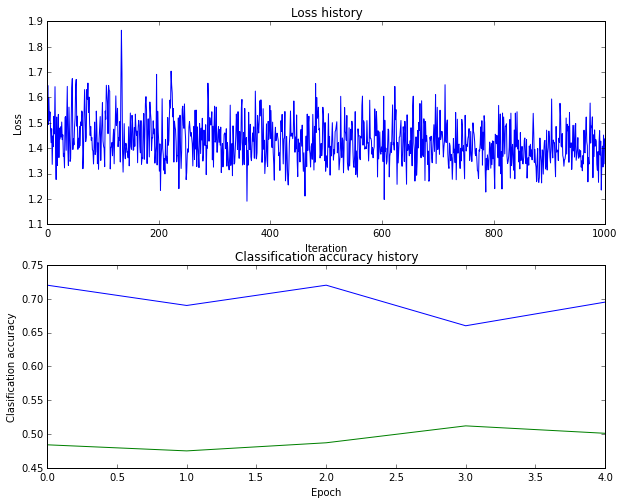

Regularization strength:  0.35
iteration 0 / 1000: loss 1.395798
iteration 100 / 1000: loss 1.488011
iteration 200 / 1000: loss 1.500376
iteration 300 / 1000: loss 1.340713
iteration 400 / 1000: loss 1.286026
iteration 500 / 1000: loss 1.347152
iteration 600 / 1000: loss 1.493455
iteration 700 / 1000: loss 1.416843
iteration 800 / 1000: loss 1.391379
iteration 900 / 1000: loss 1.361289
Validation accuracy:  0.506


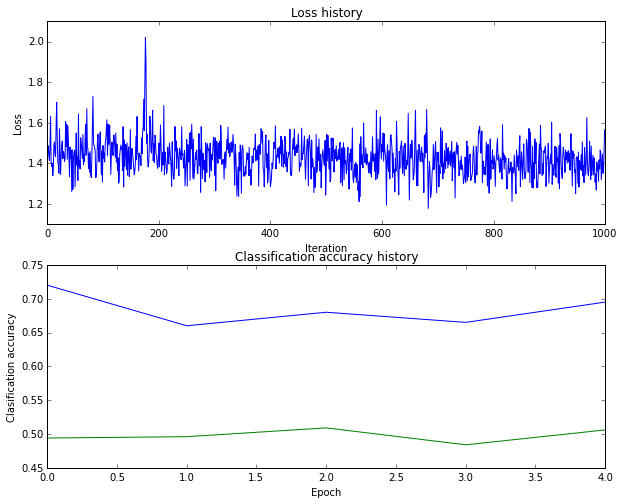

Regularization strength:  0.4
iteration 0 / 1000: loss 1.477360
iteration 100 / 1000: loss 1.462732
iteration 200 / 1000: loss 1.483120
iteration 300 / 1000: loss 1.505459
iteration 400 / 1000: loss 1.556297
iteration 500 / 1000: loss 1.324089
iteration 600 / 1000: loss 1.427928
iteration 700 / 1000: loss 1.377392
iteration 800 / 1000: loss 1.434287
iteration 900 / 1000: loss 1.464494
Validation accuracy:  0.512


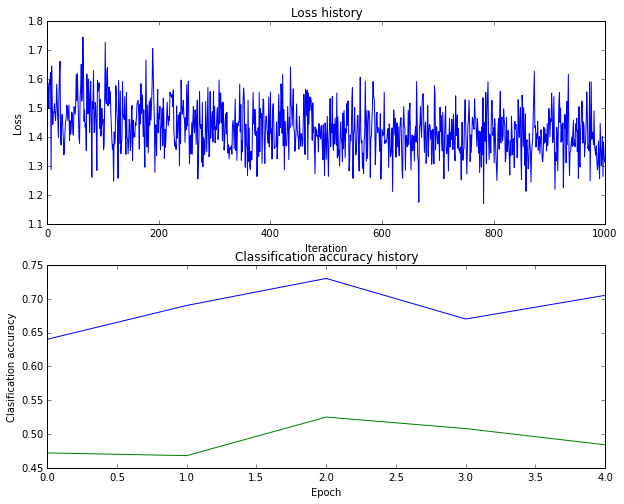

Regularization strength:  0.45
iteration 0 / 1000: loss 1.406496
iteration 100 / 1000: loss 1.509836
iteration 200 / 1000: loss 1.543054
iteration 300 / 1000: loss 1.472185
iteration 400 / 1000: loss 1.315287
iteration 500 / 1000: loss 1.455538
iteration 600 / 1000: loss 1.334311
iteration 700 / 1000: loss 1.390051
iteration 800 / 1000: loss 1.447853
iteration 900 / 1000: loss 1.472454
Validation accuracy:  0.519


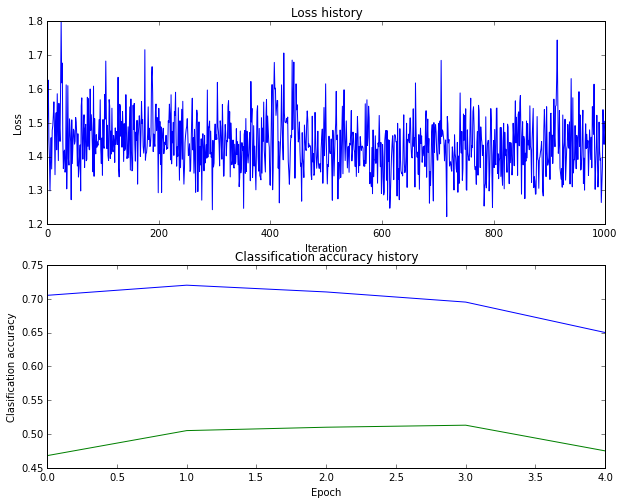

Regularization strength:  0.5
iteration 0 / 1000: loss 1.301628
iteration 100 / 1000: loss 1.508163
iteration 200 / 1000: loss 1.329908
iteration 300 / 1000: loss 1.507351
iteration 400 / 1000: loss 1.429519
iteration 500 / 1000: loss 1.335999
iteration 600 / 1000: loss 1.429210
iteration 700 / 1000: loss 1.564476
iteration 800 / 1000: loss 1.481454
iteration 900 / 1000: loss 1.427685
Validation accuracy:  0.513


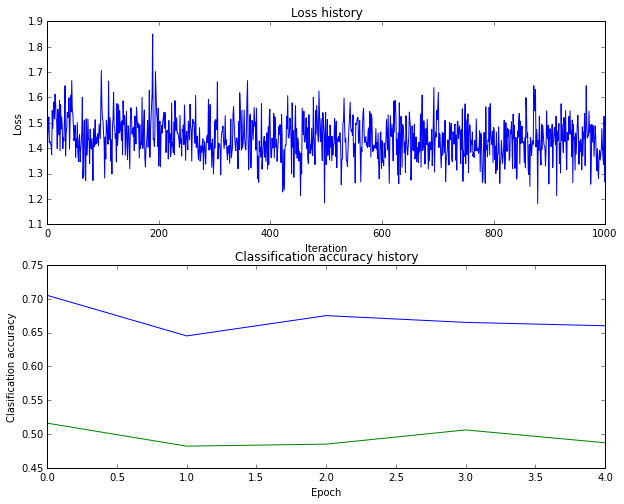

Regularization strength:  0.55
iteration 0 / 1000: loss 1.371747
iteration 100 / 1000: loss 1.522437
iteration 200 / 1000: loss 1.507834
iteration 300 / 1000: loss 1.435485
iteration 400 / 1000: loss 1.321332
iteration 500 / 1000: loss 1.409027
iteration 600 / 1000: loss 1.473572
iteration 700 / 1000: loss 1.401081
iteration 800 / 1000: loss 1.352703
iteration 900 / 1000: loss 1.364219
Validation accuracy:  0.514


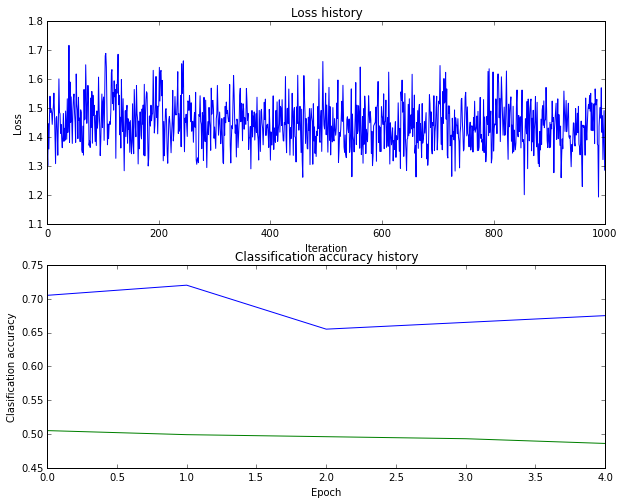

Regularization strength:  0.6
iteration 0 / 1000: loss 1.341419
iteration 100 / 1000: loss 1.359028
iteration 200 / 1000: loss 1.359531
iteration 300 / 1000: loss 1.302395
iteration 400 / 1000: loss 1.408269
iteration 500 / 1000: loss 1.581444
iteration 600 / 1000: loss 1.507801
iteration 700 / 1000: loss 1.484763
iteration 800 / 1000: loss 1.413440
iteration 900 / 1000: loss 1.547560
Validation accuracy:  0.506


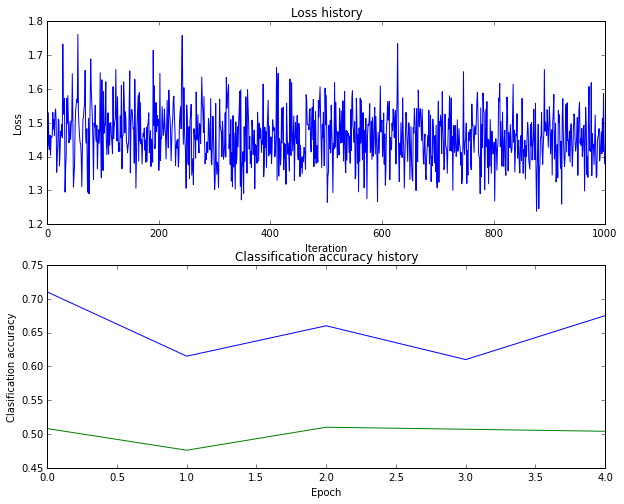

Regularization strength:  0.65
iteration 0 / 1000: loss 1.481766
iteration 100 / 1000: loss 1.583421
iteration 200 / 1000: loss 1.377649
iteration 300 / 1000: loss 1.413764
iteration 400 / 1000: loss 1.366991
iteration 500 / 1000: loss 1.417254
iteration 600 / 1000: loss 1.570708
iteration 700 / 1000: loss 1.432468
iteration 800 / 1000: loss 1.378373
iteration 900 / 1000: loss 1.585310
Validation accuracy:  0.524


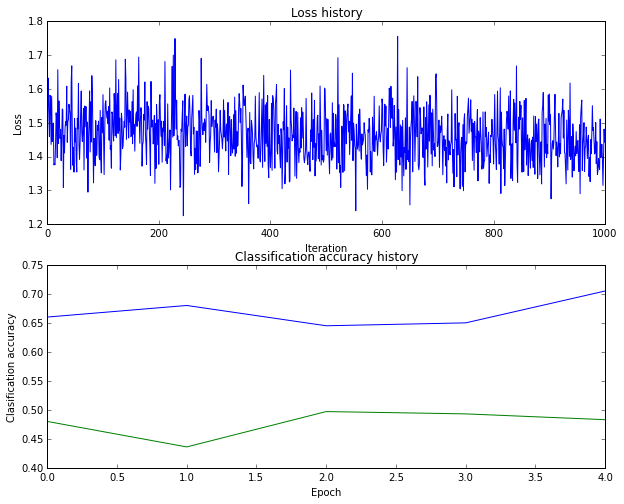

Regularization strength:  0.7
iteration 0 / 1000: loss 1.571275
iteration 100 / 1000: loss 1.559045
iteration 200 / 1000: loss 1.369606
iteration 300 / 1000: loss 1.496305
iteration 400 / 1000: loss 1.424955
iteration 500 / 1000: loss 1.420399
iteration 600 / 1000: loss 1.440537
iteration 700 / 1000: loss 1.412849
iteration 800 / 1000: loss 1.550902
iteration 900 / 1000: loss 1.474863
Validation accuracy:  0.495


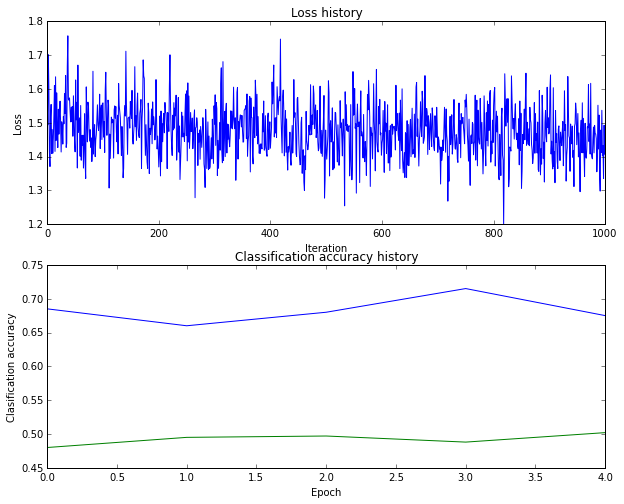

Regularization strength:  0.75
iteration 0 / 1000: loss 1.475169
iteration 100 / 1000: loss 1.473762
iteration 200 / 1000: loss 1.599508
iteration 300 / 1000: loss 1.515150
iteration 400 / 1000: loss 1.452948
iteration 500 / 1000: loss 1.449496
iteration 600 / 1000: loss 1.380305
iteration 700 / 1000: loss 1.425671
iteration 800 / 1000: loss 1.464052
iteration 900 / 1000: loss 1.368781
Validation accuracy:  0.503


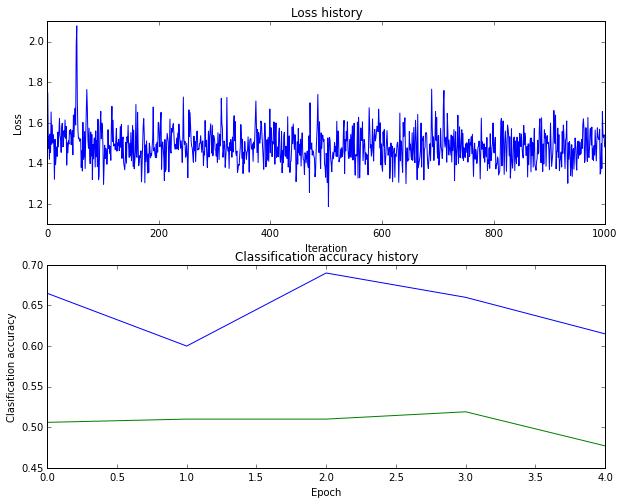

Regularization strength:  0.8
iteration 0 / 1000: loss 1.565477
iteration 100 / 1000: loss 1.543454
iteration 200 / 1000: loss 1.593531
iteration 300 / 1000: loss 1.435244
iteration 400 / 1000: loss 1.452229
iteration 500 / 1000: loss 1.449230
iteration 600 / 1000: loss 1.638707
iteration 700 / 1000: loss 1.484074
iteration 800 / 1000: loss 1.358794
iteration 900 / 1000: loss 1.486786
Validation accuracy:  0.512


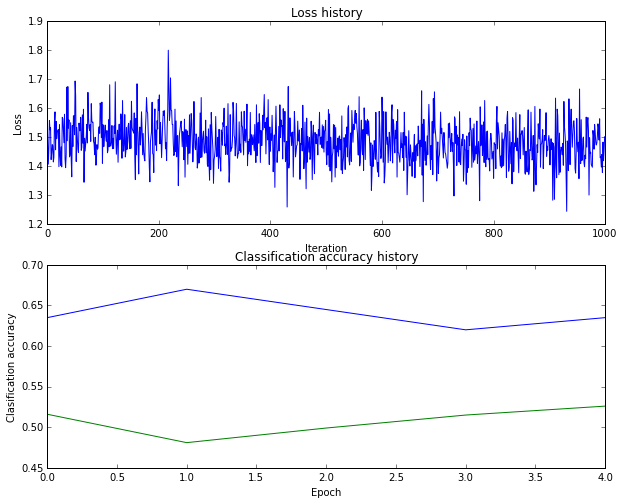

Regularization strength:  0.85
iteration 0 / 1000: loss 1.548444
iteration 100 / 1000: loss 1.639392
iteration 200 / 1000: loss 1.754340
iteration 300 / 1000: loss 1.574099
iteration 400 / 1000: loss 1.572029
iteration 500 / 1000: loss 1.579404
iteration 600 / 1000: loss 1.582080
iteration 700 / 1000: loss 1.548878
iteration 800 / 1000: loss 1.488755
iteration 900 / 1000: loss 1.433965
Validation accuracy:  0.495


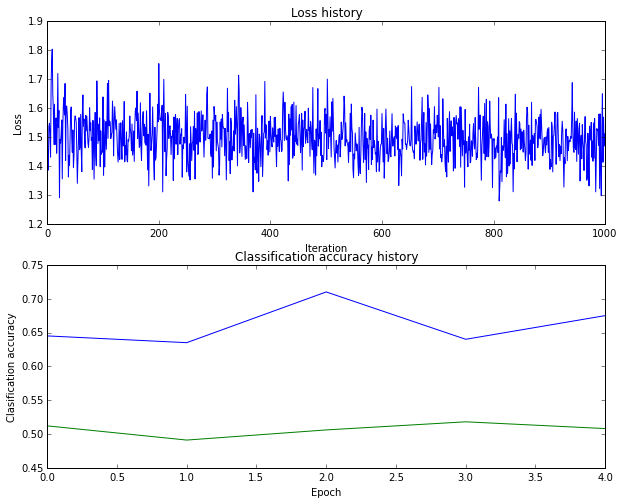

Regularization strength:  0.9
iteration 0 / 1000: loss 1.508314
iteration 100 / 1000: loss 1.524754
iteration 200 / 1000: loss 1.720222
iteration 300 / 1000: loss 1.397246
iteration 400 / 1000: loss 1.583561
iteration 500 / 1000: loss 1.442287
iteration 600 / 1000: loss 1.475249
iteration 700 / 1000: loss 1.434710
iteration 800 / 1000: loss 1.459149
iteration 900 / 1000: loss 1.392887
Validation accuracy:  0.498


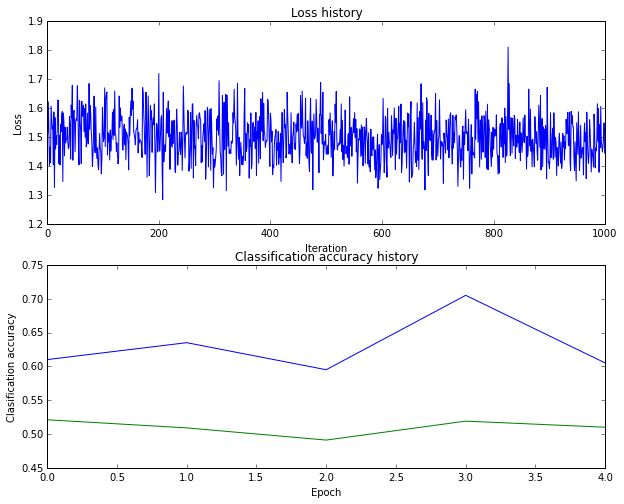

Regularization strength:  0.95
iteration 0 / 1000: loss 1.403351
iteration 100 / 1000: loss 1.445911
iteration 200 / 1000: loss 1.481242
iteration 300 / 1000: loss 1.456173
iteration 400 / 1000: loss 1.384071
iteration 500 / 1000: loss 1.396895
iteration 600 / 1000: loss 1.441982
iteration 700 / 1000: loss 1.611930
iteration 800 / 1000: loss 1.584869
iteration 900 / 1000: loss 1.504624
Validation accuracy:  0.497


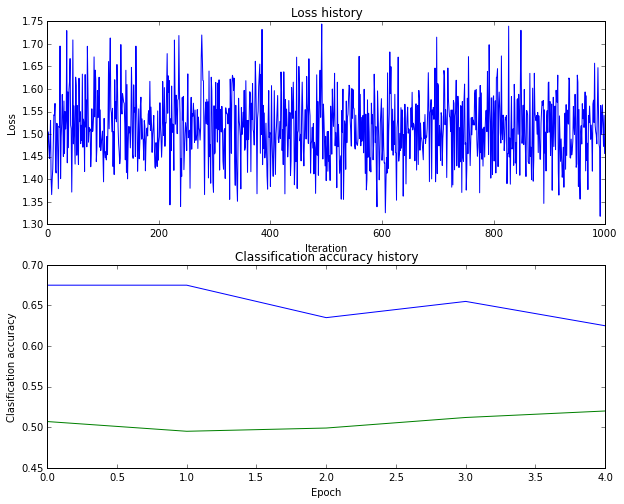

Regularization strength:  1.0
iteration 0 / 1000: loss 1.468698
iteration 100 / 1000: loss 1.514963
iteration 200 / 1000: loss 1.478303
iteration 300 / 1000: loss 1.556315
iteration 400 / 1000: loss 1.636554
iteration 500 / 1000: loss 1.504789
iteration 600 / 1000: loss 1.539786
iteration 700 / 1000: loss 1.471325
iteration 800 / 1000: loss 1.515498
iteration 900 / 1000: loss 1.592115
Validation accuracy:  0.512


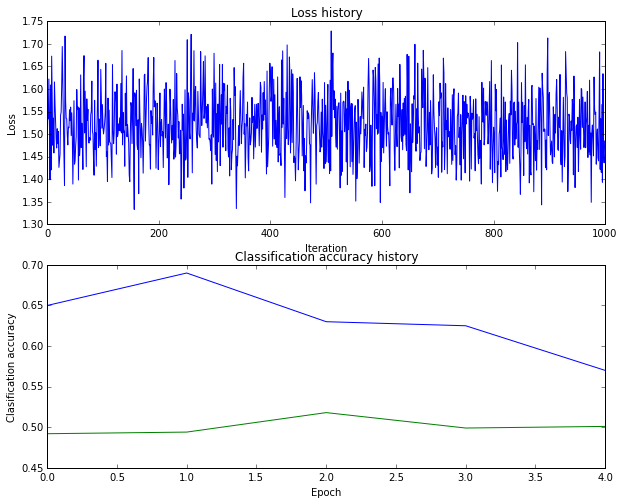

Regularization strength:  1.05
iteration 0 / 1000: loss 1.515038
iteration 100 / 1000: loss 1.439888
iteration 200 / 1000: loss 1.504815
iteration 300 / 1000: loss 1.491233
iteration 400 / 1000: loss 1.487473
iteration 500 / 1000: loss 1.464665
iteration 600 / 1000: loss 1.578276
iteration 700 / 1000: loss 1.571481
iteration 800 / 1000: loss 1.456068
iteration 900 / 1000: loss 1.541302
Validation accuracy:  0.514


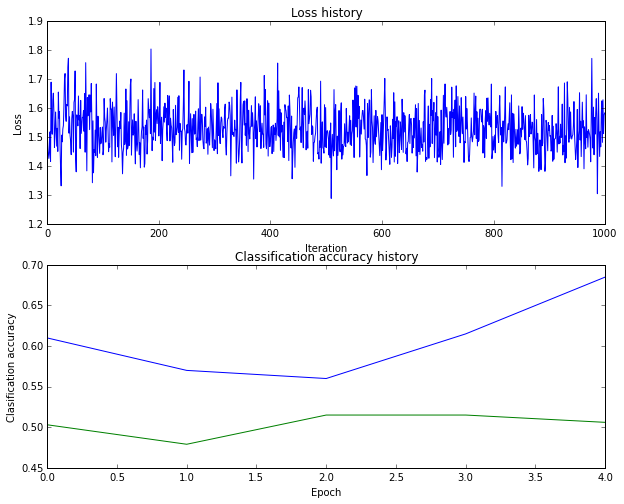

Regularization strength:  1.1
iteration 0 / 1000: loss 1.547417
iteration 100 / 1000: loss 1.486599
iteration 200 / 1000: loss 1.543627
iteration 300 / 1000: loss 1.494265
iteration 400 / 1000: loss 1.474748
iteration 500 / 1000: loss 1.615628
iteration 600 / 1000: loss 1.614440
iteration 700 / 1000: loss 1.614774
iteration 800 / 1000: loss 1.455490
iteration 900 / 1000: loss 1.522320
Validation accuracy:  0.488


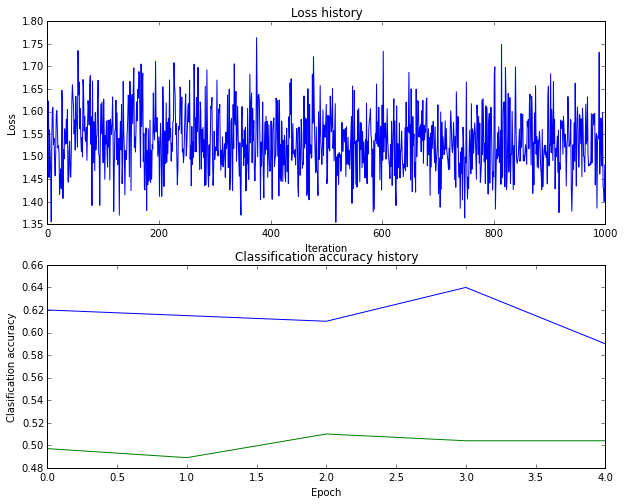

Regularization strength:  1.15
iteration 0 / 1000: loss 1.411741
iteration 100 / 1000: loss 1.578650
iteration 200 / 1000: loss 1.660932
iteration 300 / 1000: loss 1.463868
iteration 400 / 1000: loss 1.544176
iteration 500 / 1000: loss 1.527227
iteration 600 / 1000: loss 1.559025
iteration 700 / 1000: loss 1.630482
iteration 800 / 1000: loss 1.482253
iteration 900 / 1000: loss 1.517864
Validation accuracy:  0.509


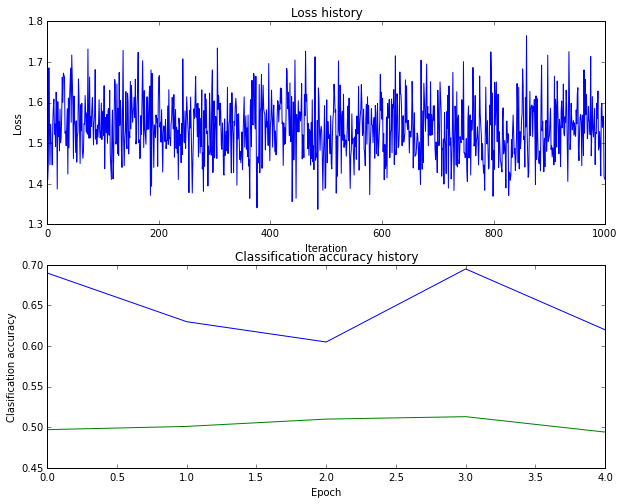

Regularization strength:  1.2
iteration 0 / 1000: loss 1.483103
iteration 100 / 1000: loss 1.542685
iteration 200 / 1000: loss 1.605401
iteration 300 / 1000: loss 1.433805
iteration 400 / 1000: loss 1.498460
iteration 500 / 1000: loss 1.590217
iteration 600 / 1000: loss 1.696133
iteration 700 / 1000: loss 1.471701
iteration 800 / 1000: loss 1.592521
iteration 900 / 1000: loss 1.551352
Validation accuracy:  0.518


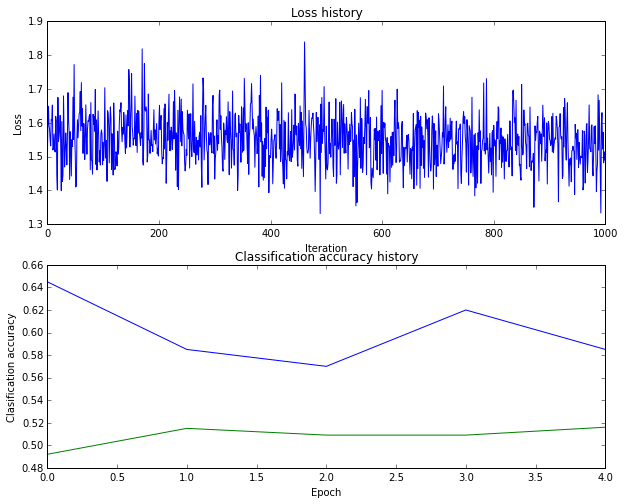

Regularization strength:  1.25
iteration 0 / 1000: loss 1.544787
iteration 100 / 1000: loss 1.505877
iteration 200 / 1000: loss 1.524658
iteration 300 / 1000: loss 1.560906
iteration 400 / 1000: loss 1.579543
iteration 500 / 1000: loss 1.533558
iteration 600 / 1000: loss 1.571677
iteration 700 / 1000: loss 1.374166
iteration 800 / 1000: loss 1.480021
iteration 900 / 1000: loss 1.609355
Validation accuracy:  0.507


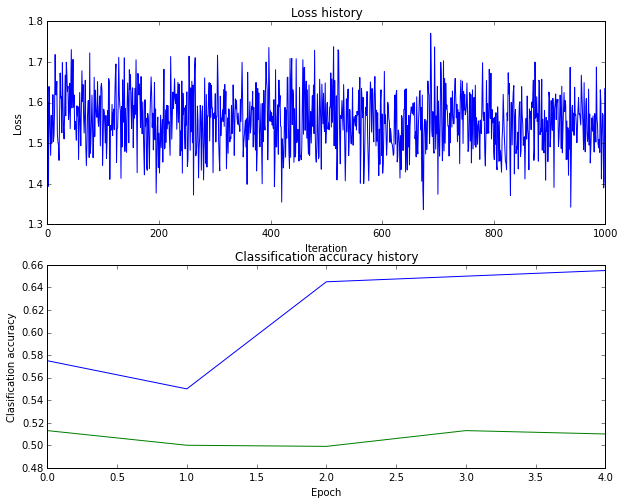

Regularization strength:  1.3
iteration 0 / 1000: loss 1.629821
iteration 100 / 1000: loss 1.459177
iteration 200 / 1000: loss 1.524062
iteration 300 / 1000: loss 1.510223
iteration 400 / 1000: loss 1.547950
iteration 500 / 1000: loss 1.644558
iteration 600 / 1000: loss 1.539853
iteration 700 / 1000: loss 1.515632
iteration 800 / 1000: loss 1.514176
iteration 900 / 1000: loss 1.429755
Validation accuracy:  0.501


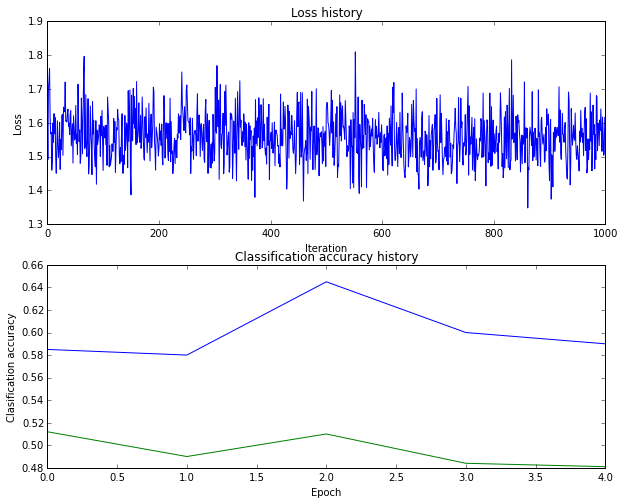

Regularization strength:  1.35
iteration 0 / 1000: loss 1.652939
iteration 100 / 1000: loss 1.598322
iteration 200 / 1000: loss 1.618632
iteration 300 / 1000: loss 1.581323
iteration 400 / 1000: loss 1.534705
iteration 500 / 1000: loss 1.546970
iteration 600 / 1000: loss 1.500092
iteration 700 / 1000: loss 1.406990
iteration 800 / 1000: loss 1.521631
iteration 900 / 1000: loss 1.547135
Validation accuracy:  0.508


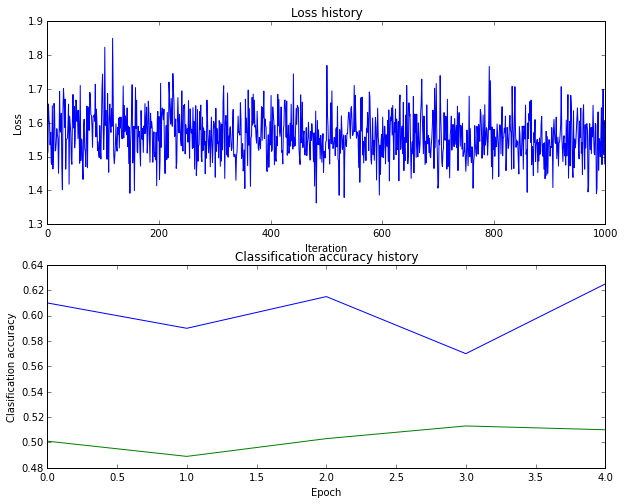

Regularization strength:  1.4
iteration 0 / 1000: loss 1.521556
iteration 100 / 1000: loss 1.669411
iteration 200 / 1000: loss 1.602280
iteration 300 / 1000: loss 1.511966
iteration 400 / 1000: loss 1.480072
iteration 500 / 1000: loss 1.644799
iteration 600 / 1000: loss 1.640229
iteration 700 / 1000: loss 1.565314
iteration 800 / 1000: loss 1.711605
iteration 900 / 1000: loss 1.496751
Validation accuracy:  0.493


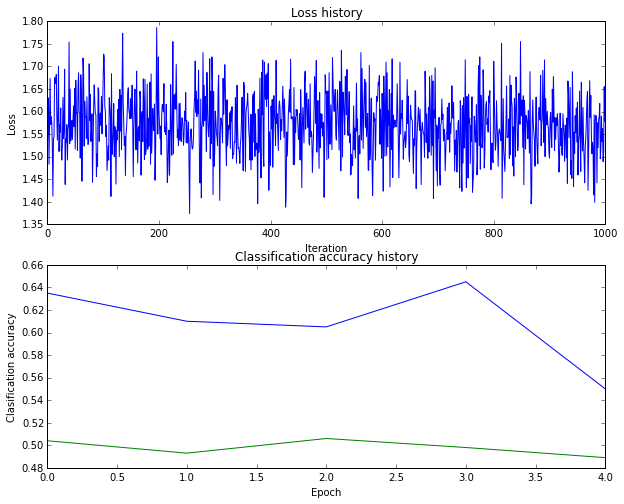

Regularization strength:  1.45
iteration 0 / 1000: loss 1.526571
iteration 100 / 1000: loss 1.432921
iteration 200 / 1000: loss 1.493199
iteration 300 / 1000: loss 1.634684
iteration 400 / 1000: loss 1.564777
iteration 500 / 1000: loss 1.642860
iteration 600 / 1000: loss 1.623690
iteration 700 / 1000: loss 1.529156
iteration 800 / 1000: loss 1.504907
iteration 900 / 1000: loss 1.488512
Validation accuracy:  0.505


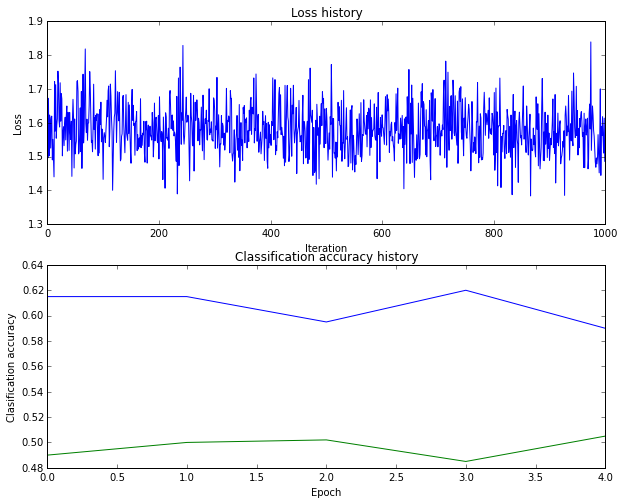

Regularization strength:  1.5
iteration 0 / 1000: loss 1.598534
iteration 100 / 1000: loss 1.404080
iteration 200 / 1000: loss 1.626561
iteration 300 / 1000: loss 1.573980
iteration 400 / 1000: loss 1.708140
iteration 500 / 1000: loss 1.583983
iteration 600 / 1000: loss 1.669700
iteration 700 / 1000: loss 1.611908
iteration 800 / 1000: loss 1.555399
iteration 900 / 1000: loss 1.489240
Validation accuracy:  0.504


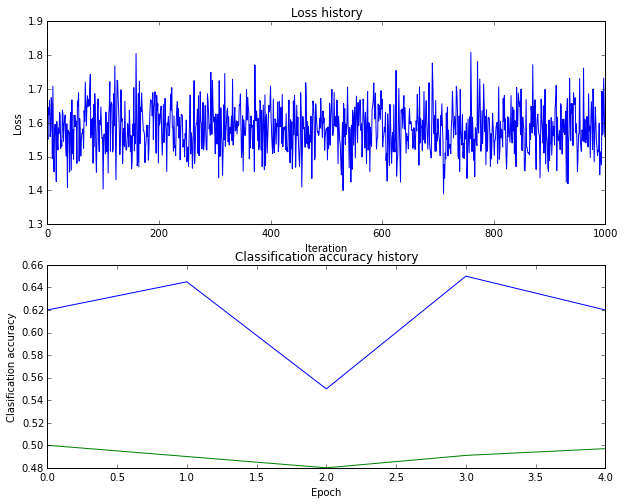

Regularization strength:  1.55
iteration 0 / 1000: loss 1.636191
iteration 100 / 1000: loss 1.626814
iteration 200 / 1000: loss 1.688922
iteration 300 / 1000: loss 1.614825
iteration 400 / 1000: loss 1.612232
iteration 500 / 1000: loss 1.550516
iteration 600 / 1000: loss 1.643706
iteration 700 / 1000: loss 1.489796
iteration 800 / 1000: loss 1.519449
iteration 900 / 1000: loss 1.516226
Validation accuracy:  0.492


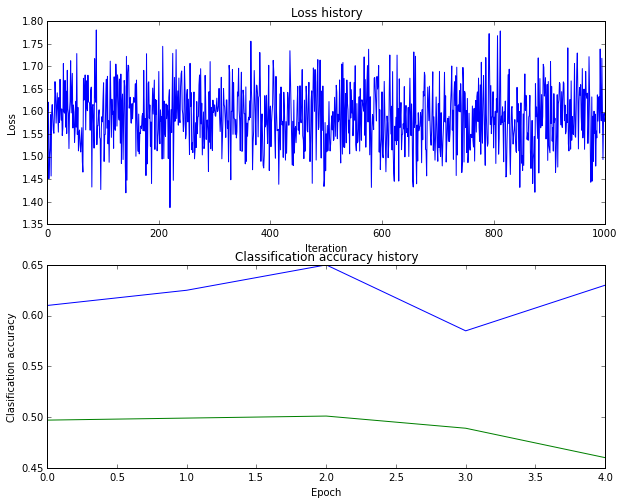

Regularization strength:  1.6
iteration 0 / 1000: loss 1.578143
iteration 100 / 1000: loss 1.614465
iteration 200 / 1000: loss 1.634713
iteration 300 / 1000: loss 1.620285
iteration 400 / 1000: loss 1.681363
iteration 500 / 1000: loss 1.610034
iteration 600 / 1000: loss 1.660247
iteration 700 / 1000: loss 1.576664
iteration 800 / 1000: loss 1.536733
iteration 900 / 1000: loss 1.585575
Validation accuracy:  0.493


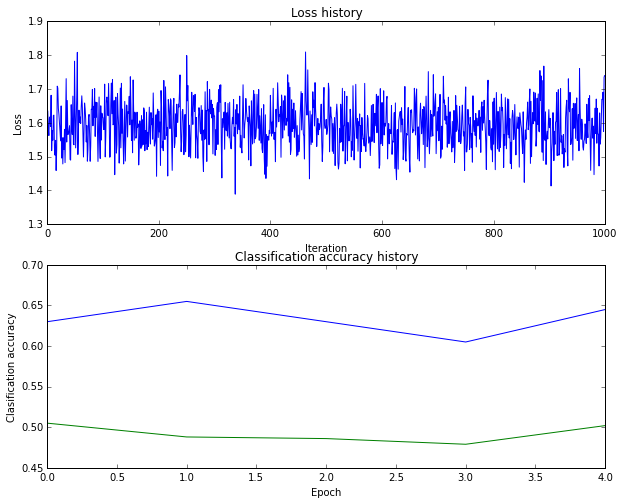

Regularization strength:  1.65
iteration 0 / 1000: loss 1.541827
iteration 100 / 1000: loss 1.712511
iteration 200 / 1000: loss 1.603220
iteration 300 / 1000: loss 1.417022
iteration 400 / 1000: loss 1.576453
iteration 500 / 1000: loss 1.572023
iteration 600 / 1000: loss 1.616565
iteration 700 / 1000: loss 1.699603
iteration 800 / 1000: loss 1.610666
iteration 900 / 1000: loss 1.561658
Validation accuracy:  0.485


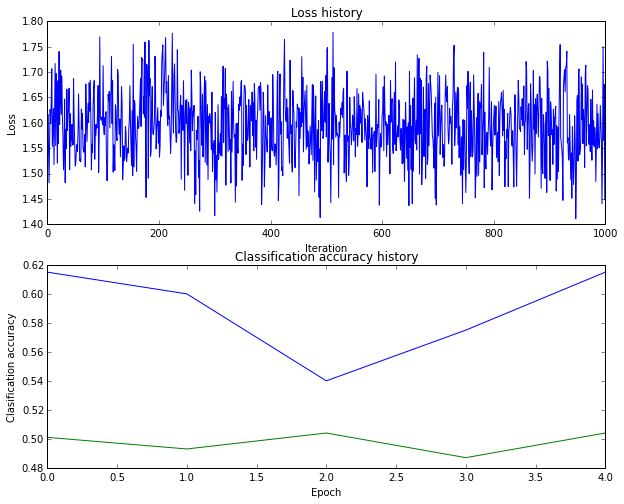

Regularization strength:  1.7
iteration 0 / 1000: loss 1.411285
iteration 100 / 1000: loss 1.507465
iteration 200 / 1000: loss 1.630022
iteration 300 / 1000: loss 1.632070
iteration 400 / 1000: loss 1.624449
iteration 500 / 1000: loss 1.510920
iteration 600 / 1000: loss 1.555188
iteration 700 / 1000: loss 1.745839
iteration 800 / 1000: loss 1.612361
iteration 900 / 1000: loss 1.637505
Validation accuracy:  0.496


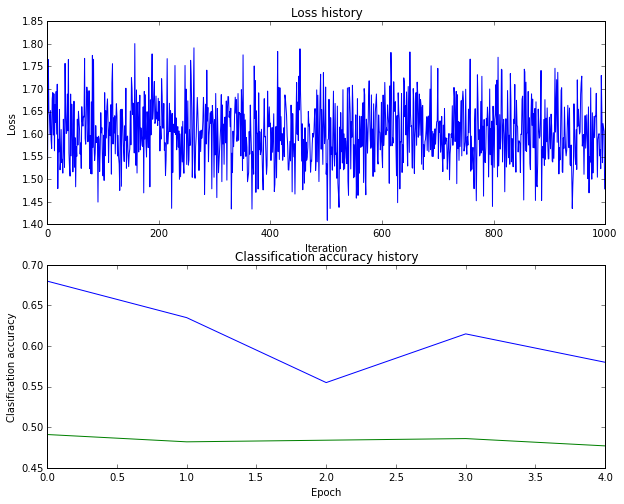

Regularization strength:  1.75
iteration 0 / 1000: loss 1.609723
iteration 100 / 1000: loss 1.650988
iteration 200 / 1000: loss 1.614420
iteration 300 / 1000: loss 1.528755
iteration 400 / 1000: loss 1.543705
iteration 500 / 1000: loss 1.620836
iteration 600 / 1000: loss 1.568714
iteration 700 / 1000: loss 1.683627
iteration 800 / 1000: loss 1.656200
iteration 900 / 1000: loss 1.633690
Validation accuracy:  0.492


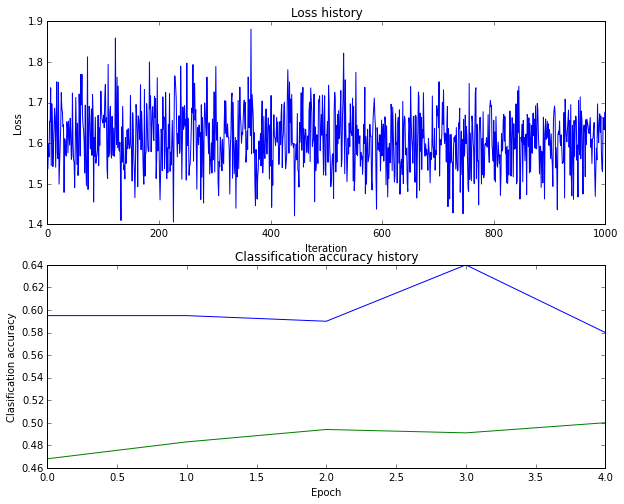

Regularization strength:  1.8
iteration 0 / 1000: loss 1.588570
iteration 100 / 1000: loss 1.471660
iteration 200 / 1000: loss 1.669577
iteration 300 / 1000: loss 1.541857
iteration 400 / 1000: loss 1.447510
iteration 500 / 1000: loss 1.515073
iteration 600 / 1000: loss 1.661538
iteration 700 / 1000: loss 1.421976
iteration 800 / 1000: loss 1.570214
iteration 900 / 1000: loss 1.592241
Validation accuracy:  0.49


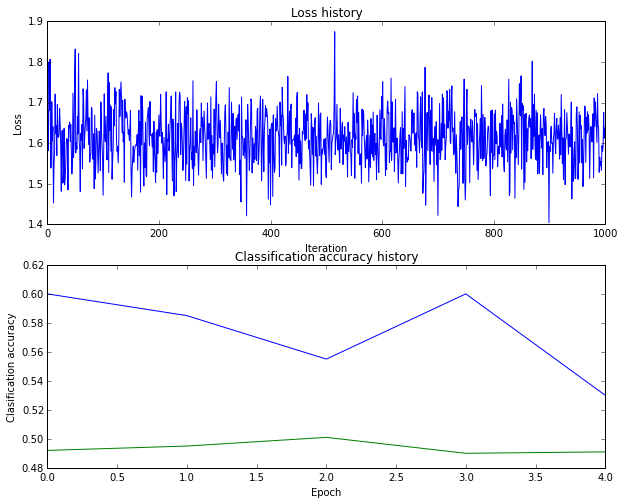

Regularization strength:  1.85
iteration 0 / 1000: loss 1.630302
iteration 100 / 1000: loss 1.726708
iteration 200 / 1000: loss 1.636536
iteration 300 / 1000: loss 1.585969
iteration 400 / 1000: loss 1.626622
iteration 500 / 1000: loss 1.493225
iteration 600 / 1000: loss 1.629955
iteration 700 / 1000: loss 1.644114
iteration 800 / 1000: loss 1.635569
iteration 900 / 1000: loss 1.545818
Validation accuracy:  0.504


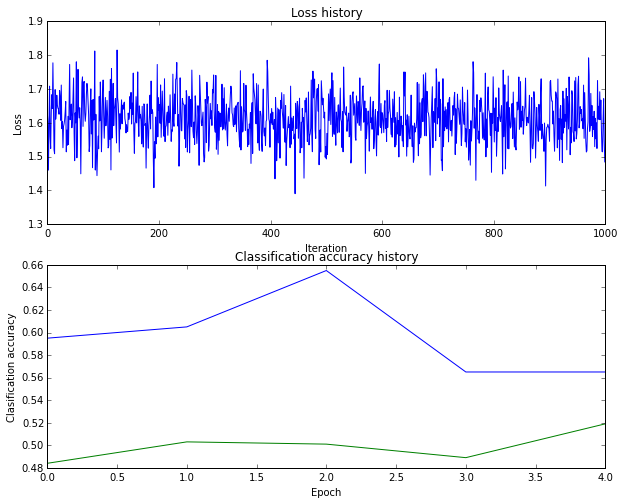

Regularization strength:  1.9
iteration 0 / 1000: loss 1.481005
iteration 100 / 1000: loss 1.660120
iteration 200 / 1000: loss 1.840357
iteration 300 / 1000: loss 1.596227
iteration 400 / 1000: loss 1.637074
iteration 500 / 1000: loss 1.544901
iteration 600 / 1000: loss 1.553498
iteration 700 / 1000: loss 1.533439
iteration 800 / 1000: loss 1.772014
iteration 900 / 1000: loss 1.500489
Validation accuracy:  0.491


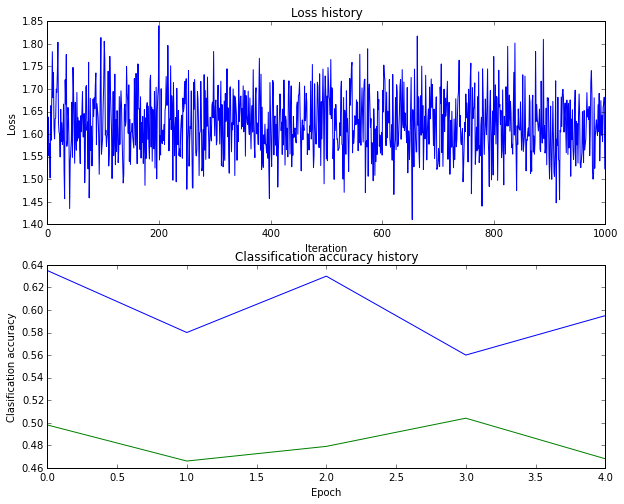

Regularization strength:  1.95
iteration 0 / 1000: loss 1.603844
iteration 100 / 1000: loss 1.630350
iteration 200 / 1000: loss 1.641702
iteration 300 / 1000: loss 1.686462
iteration 400 / 1000: loss 1.696360
iteration 500 / 1000: loss 1.597751
iteration 600 / 1000: loss 1.619328
iteration 700 / 1000: loss 1.573117
iteration 800 / 1000: loss 1.725205
iteration 900 / 1000: loss 1.574317
Validation accuracy:  0.481


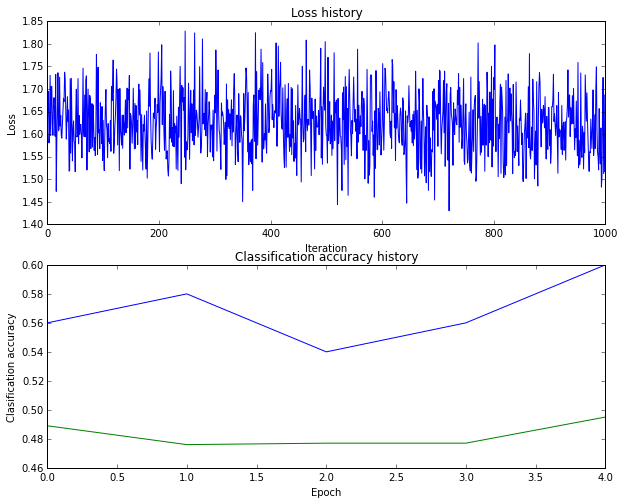

In [4]:
rs = np.arange(0,2,0.05)
for r in rs:
    print "Regularization strength: ", r

    stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-3, learning_rate_decay=0.95,
            reg=r, verbose=True)

    # Predict on the validation set
    val_acc = (net.predict(X_val) == y_val).mean()
    print 'Validation accuracy: ', val_acc
    
    plt.subplot(2, 1, 1)
    plt.plot(stats['loss_history'])
    plt.title('Loss history')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    
    plt.subplot(2, 1, 2)
    plt.plot(stats['train_acc_history'], label='train')
    plt.plot(stats['val_acc_history'], label='val')
    plt.title('Classification accuracy history')
    plt.xlabel('Epoch')
    plt.ylabel('Clasification accuracy')
    plt.show()
